In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
import time
import pandas as pd
from ecp import e_divisive, e_agglomerative
%matplotlib inline

In [2]:
def gen_data(P, l1, l2, l3, g1, g2, g3, n):
    x = np.random.poisson(l1, n)
    y = np.random.poisson(l2, n)
    z = np.random.poisson(l3, n)

    alp = np.random.poisson(g1, n)
    bet = np.random.poisson(g2, n)
    gam = np.random.poisson(g3, n)
    
    plt.hist(x)
    plt.hist(y)
    plt.hist(z)
    plt.hist(alp)
    plt.hist(bet)
    plt.hist(gam)
    
    ts = np.zeros((n, 2))
    true_states = np.zeros(n, dtype=np.int32)
    curr_state = np.random.choice(np.array([0, 1, 2]), p=np.diag(P)/np.linalg.norm(np.diag(P), ord=1))
    
    for i in range(n):
        true_states[i] = curr_state
        if curr_state == 0:
            ts[i] = np.array([x[i], alp[i]])
        elif curr_state == 1:
            ts[i] = np.array([y[i], bet[i]])
        else:
            ts[i] = np.array([z[i], gam[i]])
        curr_state = np.random.choice(np.array([0, 1, 2]), p=P[curr_state, :])

    return ts, true_states

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

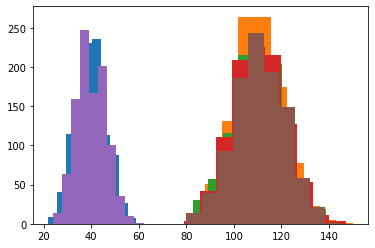

In [3]:
P = np.array([
    [0.98, 0.01, 0.01],
    [0.01, 0.98, 0.01],
    [0.04, 0.01, 0.95],
])
l1 = 40
l2 = 110
l3 = 110
g1 = 110
g2 = 40
g3 = 110
n = 1000

ts, states = gen_data(P, l1, l2, l3, g1, g2, g3, n)
print(states)

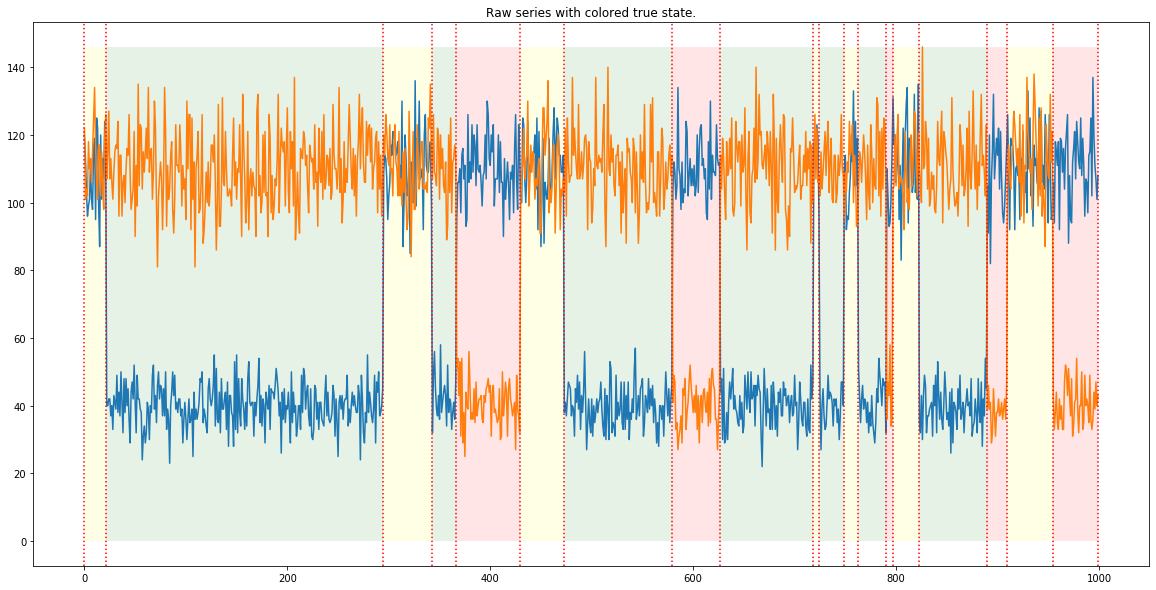

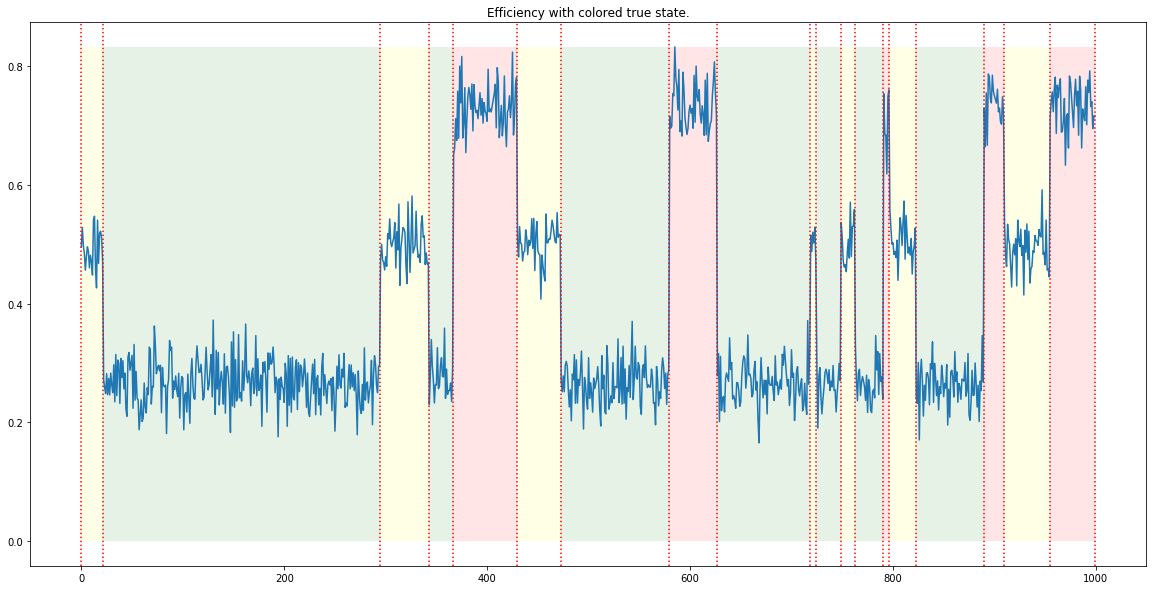

In [4]:
plt.figure(figsize=(20,10))
plt.title("Raw series with colored true state.")
plt.plot(ts)
point_labels = states
final_ests = [0]
seg_labels = [point_labels[0]]
for i in range(1, len(point_labels)):
    if point_labels[i] != point_labels[i-1]:
        final_ests.append(i)
        seg_labels.append(point_labels[i])
final_ests.append(len(point_labels))
final_ests = np.array(final_ests)
seg_labels = np.array(seg_labels)
final_ests = final_ests - 0.5
for xc in final_ests:
        plt.axvline(x=xc, color='r', linestyle=':')
mx = np.max(ts)
diff_labs = np.unique(seg_labels)
for i in range(len(seg_labels)):
    if seg_labels[i] == diff_labs[0]:
        plt.fill_betweenx([0, mx], final_ests[i], final_ests[i+1], facecolor='green', alpha=0.10)
    elif seg_labels[i] == diff_labs[1]:
        plt.fill_betweenx([0, mx], final_ests[i], final_ests[i+1], facecolor='red', alpha=0.10)
    elif seg_labels[i] == diff_labs[2]:
        plt.fill_betweenx([0, mx], final_ests[i], final_ests[i+1], facecolor='yellow', alpha=0.10)
    elif seg_labels[i] == diff_labs[3]:
        plt.fill_betweenx([0, mx], final_ests[i], final_ests[i+1], facecolor='blue', alpha=0.10)
    else:
        plt.fill_betweenx([0, mx], final_ests[i], final_ests[i+1], facecolor='orange', alpha=0.10)
        

ts2 = ts[:, 0]/(ts[:, 0] + ts[:, 1])
plt.figure(figsize=(20,10))
plt.title("Efficiency with colored true state.")
plt.plot(ts2)
point_labels = states
final_ests = [0]
seg_labels = [point_labels[0]]
for i in range(1, len(point_labels)):
    if point_labels[i] != point_labels[i-1]:
        final_ests.append(i)
        seg_labels.append(point_labels[i])
final_ests.append(len(point_labels))
final_ests = np.array(final_ests)
seg_labels = np.array(seg_labels)
final_ests = final_ests - 0.5
for xc in final_ests:
        plt.axvline(x=xc, color='r', linestyle=':')
mx = np.max(ts2)
diff_labs = np.unique(seg_labels)
for i in range(len(seg_labels)):
    if seg_labels[i] == diff_labs[0]:
        plt.fill_betweenx([0, mx], final_ests[i], final_ests[i+1], facecolor='green', alpha=0.10)
    elif seg_labels[i] == diff_labs[1]:
        plt.fill_betweenx([0, mx], final_ests[i], final_ests[i+1], facecolor='red', alpha=0.10)
    elif seg_labels[i] == diff_labs[2]:
        plt.fill_betweenx([0, mx], final_ests[i], final_ests[i+1], facecolor='yellow', alpha=0.10)
    elif seg_labels[i] == diff_labs[3]:
        plt.fill_betweenx([0, mx], final_ests[i], final_ests[i+1], facecolor='blue', alpha=0.10)
    else:
        plt.fill_betweenx([0, mx], final_ests[i], final_ests[i+1], facecolor='orange', alpha=0.10)

In [5]:
# ts is the time series to be analyzed
# num_states is the number of states in the model (default: 4)
# ms is the minimum segment size (default: 2)
# alpha is the exponential for the distance matrix (default: 2)
# K is the number of change points to look for in the initial e_divisive call (default: 100)

def fret_model(ts, num_states=4, ms=2, alpha=2, K=100):

#######################################
# Helper Functions:

    # Helper function for the intra-matrix distance calculation.
    def get_within(alpha, X):
        alpha = float(alpha)
        ret = 0.0
    
        n = X.shape[0]

        for i in range(n):
            for j in range(n):
                ret += np.power(np.sqrt(np.sum((X[i, :] - X[j, :]) * (X[i, :] - X[j, :]))), alpha)
        return ret/(n*n) if (n*n) != 0 else np.nan

    # Helper function for the inter-matrix distance calculation.
    def get_between(alpha, X, Y):
        alpha = float(alpha)
        ret = 0.0

        n = X.shape[0]
        m = Y.shape[0]

        for i in range(n):
            for j in range(m):
                ret += np.power(np.sqrt(np.sum((X[i, :] - Y[j, :]) * (X[i, :] - Y[j, :]))), alpha)
        return (2*ret)/float(n*m) if (n*m) != 0 else np.nan

    # Helper function for custom agglomerative segmentation
    def agglo_method(alpha, n, ts, cluster, k):
        ret = {"order": [], "cluster": cluster}
        curr_n = n
        if curr_n <= k:
            return ret

        within = np.zeros(n)
        for i in range(n):
            working_ts = ts[cluster==i]
            if working_ts.ndim == 1: working_ts = np.reshape(working_ts, (len(working_ts), 1))
            within[i] = get_within(alpha, working_ts)

        dflat = np.zeros(int(((n*n)-n)/2))
        idx = 0
        md = [] #maps from the linear index to the tuple (i, j) in the non-flattened distance matrix

        for i in range(n):
            for j in range(i+1, n):
                working_ts1 = ts[cluster==i]
                working_ts2 = ts[cluster==j]
                if working_ts1.ndim == 1: working_ts1 = np.reshape(working_ts1, (len(working_ts1), 1))
                if working_ts2.ndim == 1: working_ts2 = np.reshape(working_ts2, (len(working_ts2), 1))
                d = get_between(alpha, working_ts1, working_ts2) - within[i] - within[j]
                dflat[idx] = d
                idx += 1
                md.append((i, j))
        while(curr_n > k):
            min_idx = np.nanargmin(dflat)
            i, j = md[min_idx]
            ret["order"].append((i, j))


            cluster[cluster==j] = i
            working_ts = ts[cluster == i]
            if working_ts.ndim == 1: working_ts = np.reshape(working_ts, (len(working_ts), 1))
            new_within = get_within(alpha, working_ts)
            within[i] = new_within
            within[j] = new_within

            for idx in range(n):
                if idx != j and idx != i:
                    working_ts1 = ts[cluster==i]
                    working_ts2 = ts[cluster==idx]
                    if working_ts1.ndim == 1: working_ts1 = np.reshape(working_ts1, (len(working_ts1), 1))
                    if working_ts2.ndim == 1: working_ts2 = np.reshape(working_ts2, (len(working_ts2), 1))
                    d = get_between(alpha, working_ts1, working_ts2) - within[i] - within[idx]

                    if idx < i:
                        flat_idx = int(((2*idx*n) - (idx*idx) + (2*i) - (3*idx) - 2)/2)
                        dflat[flat_idx] = d
                    elif idx > i:
                        flat_idx = int(((2*i*n) - (i*i) + (2*idx) - (3*i) - 2)/2)
                        dflat[flat_idx] = d

                    if idx < j:
                        flat_idx = int(((2*idx*n) - (idx*idx) + (2*j) - (3*idx) - 2)/2)
                        dflat[flat_idx] = np.inf
                    elif idx > j:
                        flat_idx = int(((2*j*n) - (j*j) + (2*idx) - (3*j) - 2)/2)
                        dflat[flat_idx] = np.inf
                elif idx == j:
                    t1, t2 = (i, j) if i < j else (j, i)
                    flat_idx = int(((2*t1*n) - (t1*t1) + (2*t2) - (3*t1) - 2)/2)
                    dflat[flat_idx] = np.inf  

                    flat_idx = int(((2*t2*n) - (t2*t2) + (2*t1) - (3*t2) - 2)/2)
                    dflat[flat_idx] = np.inf
            curr_n = len(np.unique(cluster))
        ret["cluster"] = cluster
        return ret 
    
    # End helper functions.
    ######################################
    
    sol_dict = e_divisive.e_divisive(X = ts, k=K, alpha=alpha, min_size=ms)
    plt.figure(figsize=(20,10))
    plt.plot(ts)
    for xc in sol_dict['estimates']:
        plt.axvline(x=xc, color='r', linestyle=':')
        
    point_labels = agglo_method(alpha=2, n=len(sol_dict['estimates'])-1, ts=np.copy(ts), cluster=np.copy(sol_dict['cluster']), k=num_states)["cluster"]
    final_ests = [sol_dict['estimates'][0]]
    seg_labels = [point_labels[0]]
    for i in range(1, len(point_labels)):
        if point_labels[i] != point_labels[i-1]:
            final_ests.append(i)
            seg_labels.append(point_labels[i])
    final_ests.append(sol_dict['estimates'][-1])
    final_ests = np.array(final_ests)
    seg_labels = np.array(seg_labels)
    
    lens = np.diff(final_ests)
    find_avg_time = np.vectorize(lambda x : np.mean(lens[seg_labels == x]))
    avg_times = find_avg_time(np.unique(seg_labels))
    
    P_diag = np.vectorize(lambda x : (x - 1)/x)(avg_times)

    est_P = np.zeros((num_states, num_states))
    fixed_labels = np.copy(seg_labels)
    unq = np.unique(seg_labels)
    for i in range(len(unq)):
        fixed_labels[fixed_labels == unq[i]] = i

    for i in range(1, len(seg_labels)):
        est_P[fixed_labels[i-1], fixed_labels[i]] += 1
    np.fill_diagonal(est_P, 0)
    est_P = normalize(est_P, axis = 1, norm='l1')
    est_P = (est_P.T*(1 - P_diag)).T
    np.fill_diagonal(est_P, P_diag)
    
    plt.figure(figsize=(20,10))
    plt.plot(ts)
    final_ests = final_ests - 0.5
    for xc in final_ests:
        plt.axvline(x=xc, color='r', linestyle=':')
    mx = np.max(ts)
    diff_labs = np.unique(seg_labels)
    for i in range(len(seg_labels)):
        if seg_labels[i] == diff_labs[0]:
            plt.fill_betweenx([0, mx], final_ests[i], final_ests[i+1], facecolor='green', alpha=0.10)
        elif seg_labels[i] == diff_labs[1]:
            plt.fill_betweenx([0, mx], final_ests[i], final_ests[i+1], facecolor='red', alpha=0.10)
        elif seg_labels[i] == diff_labs[2]:
            plt.fill_betweenx([0, mx], final_ests[i], final_ests[i+1], facecolor='yellow', alpha=0.10)
        elif seg_labels[i] == diff_labs[3]:
            plt.fill_betweenx([0, mx], final_ests[i], final_ests[i+1], facecolor='blue', alpha=0.10)
        else:
            plt.fill_betweenx([0, mx], final_ests[i], final_ests[i+1], facecolor='orange', alpha=0.10)

    print("Estimated P: ")
    print(est_P)
    return point_labels

Estimated P: 
[[0.96568627 0.02941176 0.00490196]
 [0.00490998 0.98854337 0.00654664]
 [0.02027027 0.00675676 0.97297297]]


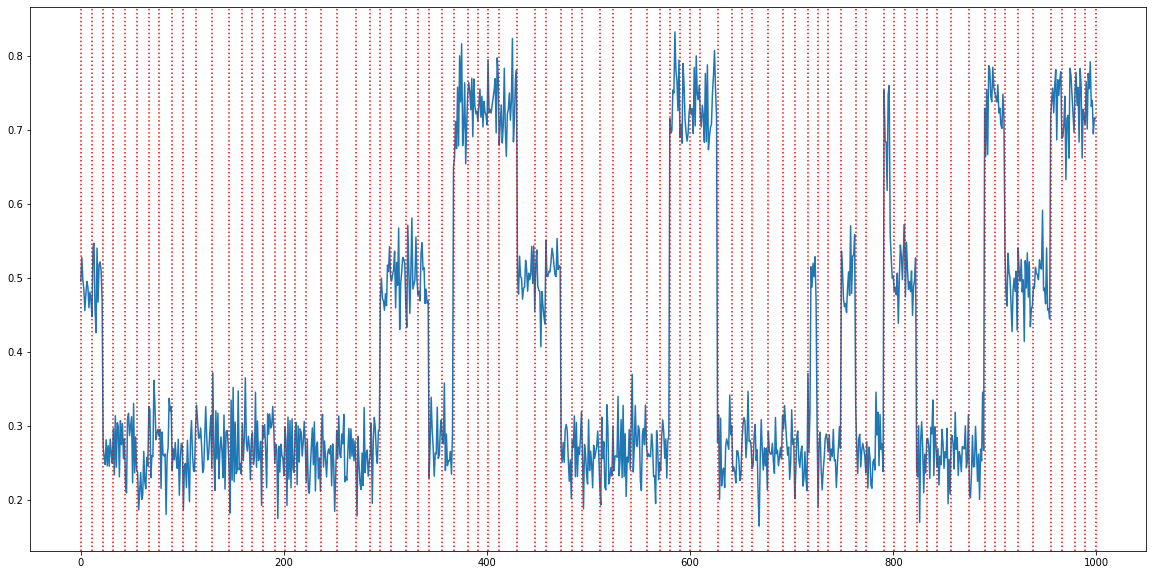

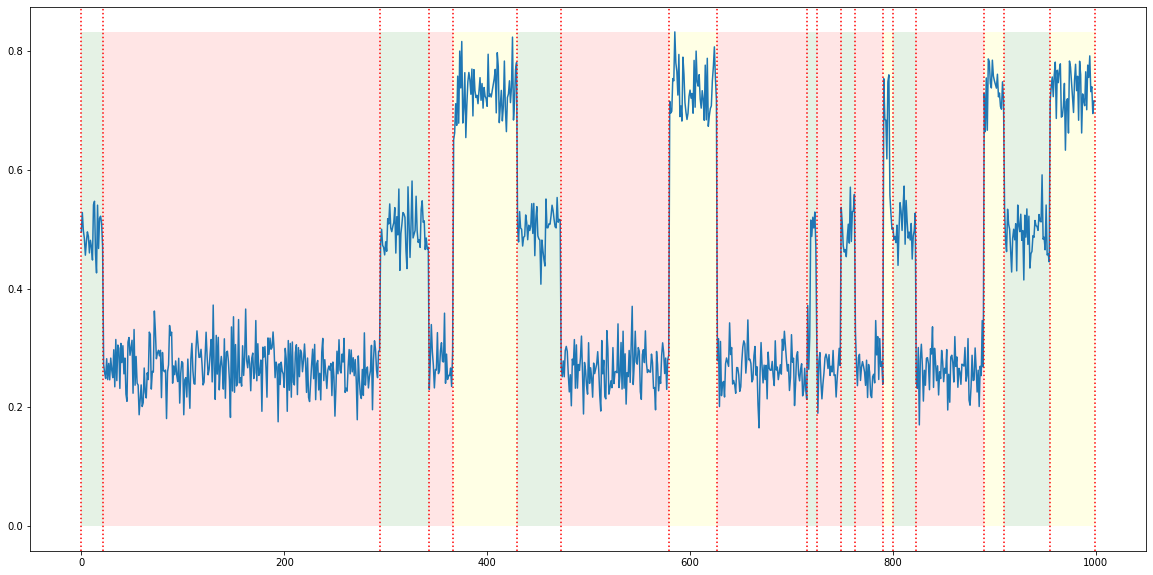

In [32]:
#segs = fret_model(ts, num_states=3, ms=10, alpha=1, K=100) #default
segs = fret_model(np.reshape(ts2, (len(ts2), 1)), num_states=3, ms=10, alpha=1, K=100) #on efficiency

In [34]:
print(segs)
print(states)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [35]:
segs2 = np.copy(segs)

In [36]:
segs2[segs2 == 0] = 5
segs2[segs2 == 2] = 0
segs2[segs2 == 5] = 2
segs2[segs2 == 30] = 1
# segs2[segs2 == 17] = 1


In [37]:
print(segs2)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [38]:
print(states)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

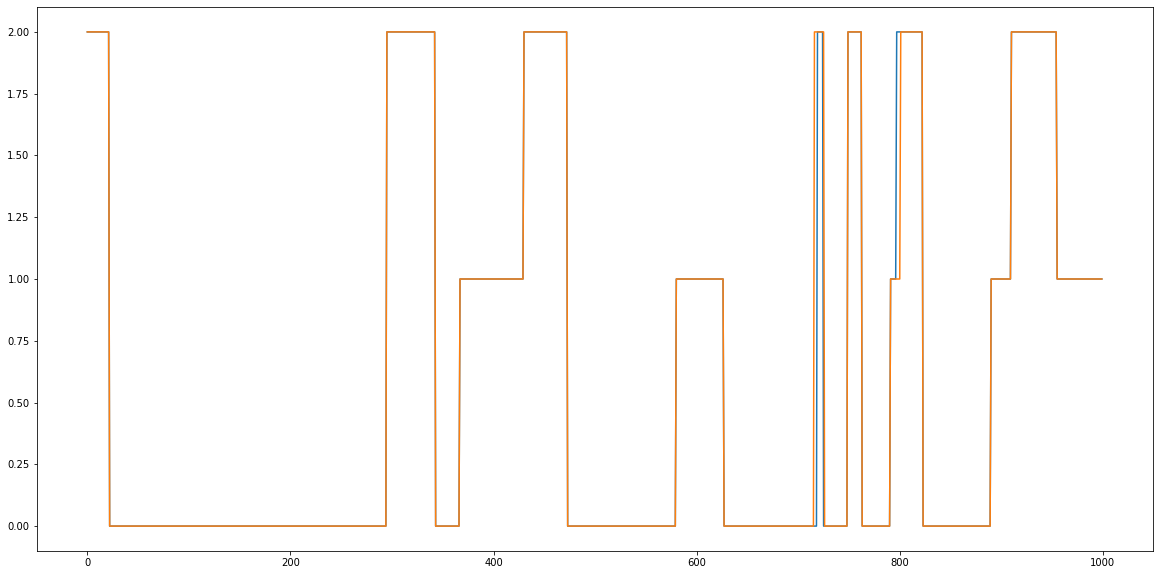

In [39]:
plt.figure(figsize=(20,10))
plt.plot(states)
plt.plot(segs2)

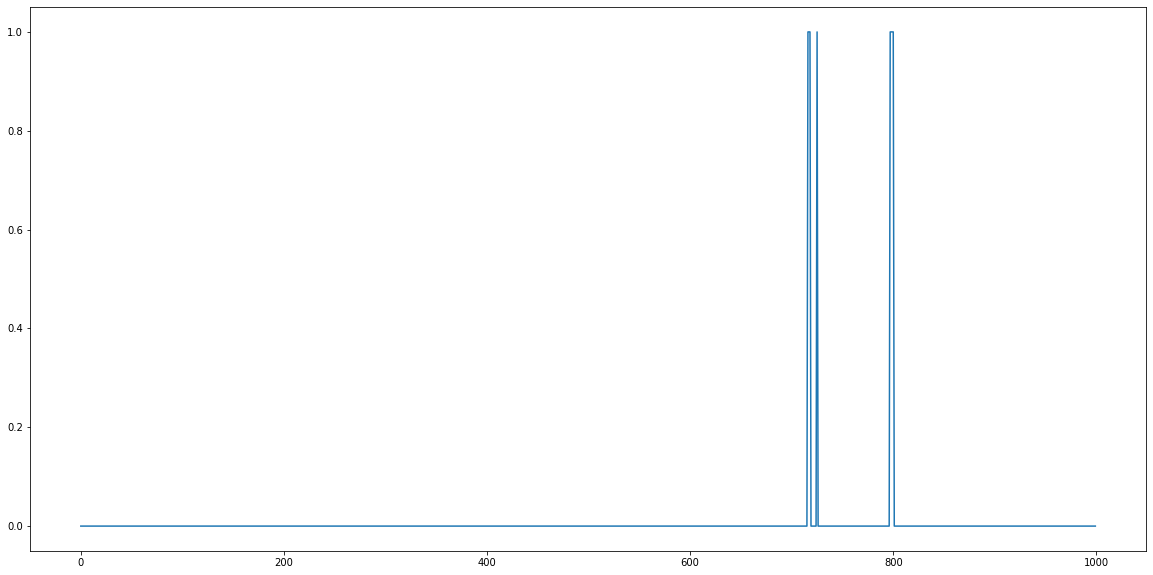

In [40]:
diff = states != segs2
plt.figure(figsize=(20,10))
plt.plot(diff)

In [41]:
raw_diff = np.sum(diff != 0)
num_diff = np.sum(np.diff(diff != 0))
print("Total points diff: " + str(raw_diff))
print("Avg length of diff: " + str(raw_diff/num_diff))

Total points diff: 8
Avg length of diff: 1.3333333333333333


In [33]:
saved = np.copy(np.diff(diff != 0))

In [ ]:
s